In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connecting to the PostgreSQL database
try:
    conn = psycopg2.connect(
        host="localhost",
        dbname="PC Games Sales",
        user="postgres",
        password="Felipe1998",
    )
    print("Succesfuly connected")
except psycopg2.Error as e:
    print("Error: Could not make connection to the Postgres database")
    print(e)

Succesfuly connected


In [3]:
#Reading the Table "Games" to do an EDA"
query = """SELECT * FROM Games"""
Games = pd.read_sql(query, conn, parse_dates="relase_date")
Games

,id,name,sales_millions,series,release_date,genre,developer,publisher
0,1,PlayerUnknown's Battlegrounds,42.0,,Dec-17,Battle royale,PUBG Studios,Krafton
1,2,Minecraft,33.0,Minecraft,Nov-11,"Sandbox,Â survival",Mojang Studios,Mojang Studios
2,3,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,4,Garry's Mod,20.0,,Nov-06,Sandbox,Facepunch Studios,Valve
4,5,Terraria,17.2,,May-11,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...,...
170,171,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers
171,172,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts
172,173,Who Wants to Be a Millionaire?,1.0,,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios
173,174,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts


In [4]:
sns.set_theme(style="darkgrid")

#### Five most sold games 

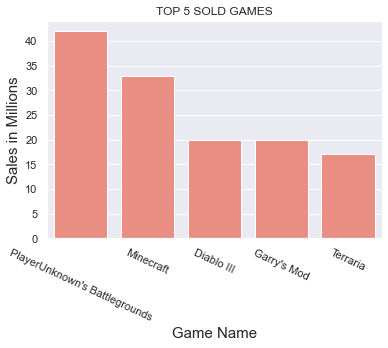

In [5]:
top_five_sales = Games.sort_values("sales_millions",ascending=False).iloc[:5]
sns.barplot(x="name", y="sales_millions",data=top_five_sales,color="salmon")
plt.title("TOP 5 SOLD GAMES")
plt.xlabel("Game Name", fontsize=(15))
plt.ylabel("Sales in Millions", fontsize=(15))
plt.xticks(rotation=-25)
plt.show()

#### WHICH GENRE IS THE MOST POPULAR?

This can be done in two ways
First, which genre made the most more millions of dollars
Second, which genre was most bought indifferent to sales

In [6]:
"""FIRST"""
Genre_1 = Games.groupby("genre")["sales_millions"].sum().sort_values(ascending=False).reset_index()
Genre_1

,genre,sales_millions
0,Action role-playing,58.1
1,Real-time strategy,55.0
2,Battle royale,52.0
3,First-person shooter,46.0
4,"Sandbox,Â survival",33.0
...,...,...
56,"Real-time strategy,Â grand strategy wargame",1.0
57,Platform,1.0
58,Rail shooter,1.0
59,Point-and-click,1.0


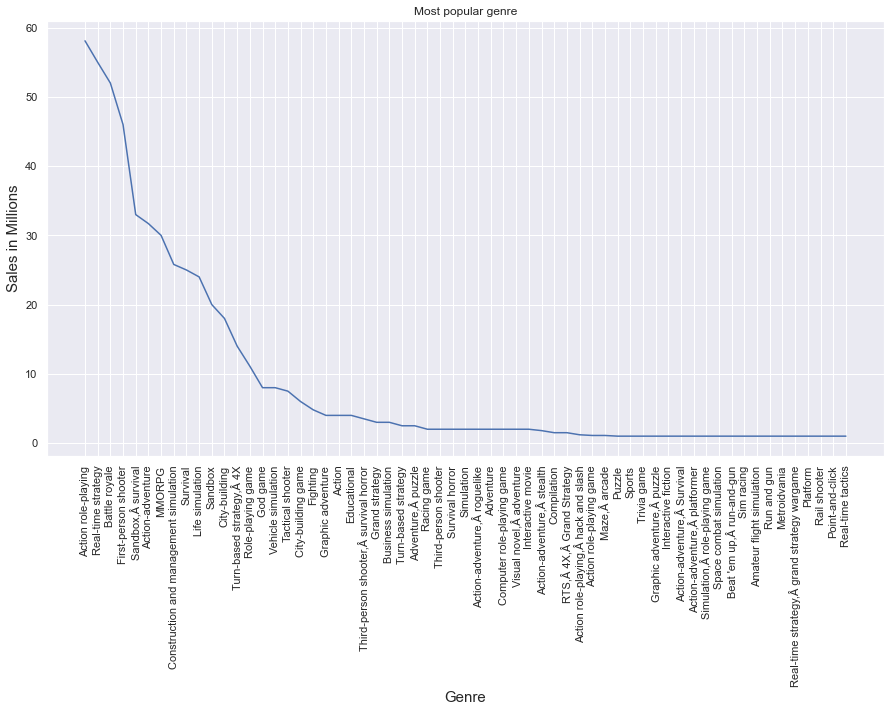

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=Genre_1, x="genre",y="sales_millions")
plt.title("Most popular genre")
plt.xlabel("Genre", fontsize=(15))
plt.ylabel("Sales in Millions", fontsize=(15))
plt.xticks(rotation=90)
plt.show()

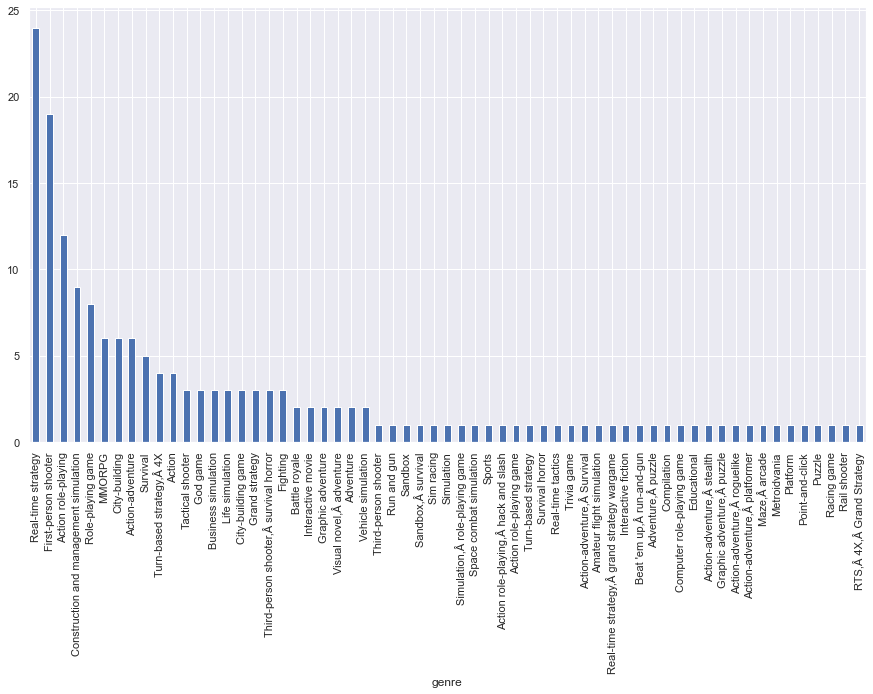

genre
Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Point-and-click                            1
Puzzle                                     1
Racing game                                1
Rail shooter                               1
RTS,Â 4X,Â Grand Strategy                  1
Name: genre, Length: 61, dtype: int64

In [8]:
Genre_2 = Games.groupby("genre")["genre"].count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
Genre_2.plot(kind="bar")
plt.show()
Genre_2

Action role-playing was the genre with the most sales with 58.1 millions dollars, but only sold 12 games, while Real-time strategy sold 24 (the double) but had less sales (55.0) campare with the firt genre. Which is why I think this tow are the most popular genres

#### WHICH PUBLISHER PUBLISHED MOST OF THE GAMES?

In [14]:
publisher_frecuency = Games.groupby("publisher")["publisher"].count().sort_values(ascending=False)
publisher_frecuency.iloc[:5]


publisher
Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: publisher, dtype: int64

Electronic arts with 19 and Blizzard Entertainment are publisher with the most published games 